In [29]:
from numpy import *
from sklearn import linear_model

In [30]:
def matrixTolist(matrix):
    r = shape(matrix)[0]
    temp = array(matrix)
    templist = []
    for i in range(r):  # temp[i]是数组，tolist后变成列表
        templist.append(temp[i].tolist()[0])
    return templist

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()  # 两个都是字符串处理函数 lineArr为列表
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [31]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()      # 获取数据集和类别标签
    dataArr = array(dataMat)
    n = shape(dataArr)[0]                  # 数据集的行数目
    xcord1 = []; ycord1 = []               # 一类的xy坐标
    xcord2 = []; ycord2 = []               # 另一类的xy坐标
    for i in range(n):
        if int(labelMat[i]) == 1:          # 如果该行数据属于第一类
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])  # 取出该行的xy值
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])  # 否则存储到另一类
    fig = plt.figure()
    ax = fig.add_subplot(111)   # 1行一列的第一个
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')  # 绘制1类散点图 s是标记的大小 scatter 是播撒的意思
    ax.scatter(xcord2, ycord2, s=30, c='green')            # 绘制2类散点图
    x = arange(-3.0, 3.0, 0.01)    # 600点
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');  
    plt.show()

In [94]:
dataset, classlabel = loadDataSet()
print(dataset[0:10])
print(len(dataset))

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743]]
100


In [100]:
clf = linear_model.SGDClassifier(alpha=0,loss='log', n_iter=600, learning_rate="constant", eta0=0.01, average=100)

In [101]:
clf.fit(dataset, classlabel)

SGDClassifier(alpha=0, average=100, class_weight=None, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='log', n_iter=600, n_jobs=1, penalty='l2', power_t=0.5,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [102]:
print(clf.coef_)

[[ 4.61339403  0.86305586 -1.2756756 ]]


In [103]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()      # 获取数据集和类别标签
    dataArr = array(dataMat)
    n = shape(dataArr)[0]                  # 数据集的行数目
    xcord1 = []; ycord1 = []               # 一类的xy坐标
    xcord2 = []; ycord2 = []               # 另一类的xy坐标
    for i in range(n):
        if int(labelMat[i]) == 1:          # 如果该行数据属于第一类
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])  # 取出该行的xy值
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])  # 否则存储到另一类
    fig = plt.figure()
    ax = fig.add_subplot(111)   # 1行一列的第一个
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')  # 绘制1类散点图 s是标记的大小 scatter 是播撒的意思
    ax.scatter(xcord2, ycord2, s=30, c='green')            # 绘制2类散点图
    x = arange(-3.0, 3.0, 0.01)    # 600点
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');  
    plt.show()

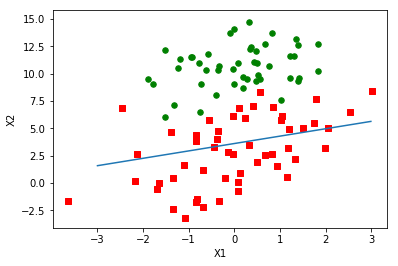

In [104]:
plotBestFit(clf.coef_.squeeze())